In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import os
import matplotlib.pyplot as plt
from numpy import exp, abs, log
from metrics import *

import universal as up
from universal import tools, algos
from universal.algos import *

sns.set_context("notebook")
plt.rcParams["figure.figsize"] = (10, 5)

In [2]:
metrics_lst =['cumulative_return(rt_v)', 'daily_return(rt_v)', 
              'cumulative_return_fee(rt_v, x_vec, paras["c"])', 'daily_return_fee(rt_v, x_vec, paras["c"])', 
              'max_redraw(rt_v)', 'sharpe_ratio(rt_v, paras["rf"])', 'volatility(rt_v)', 'turnover(rt_v)']

paras = {'c':0.001, 'rf':0.001}

# SNP500

## data

In [3]:
path = './stock_data/data/price/snp500/processed/'
drop_duplicate_path = './stock_data/data/price/snp500/dropped/'
filename = os.listdir(path)
_df = pd.read_csv(drop_duplicate_path + filename[0], index_col='date', parse_dates=True)
df_close = _df.loc[~_df.index.duplicated(), ['close']].rename(columns={'close': (filename[0].split('_')[0])})

# df_close = pd.DataFrame()
for fid in range(1, len(filename)):

    # print(fid, filename[fid])
    '''
    _df = pd.read_csv(path + filename[fid], index_col='date', parse_dates=True)
    # 如果你想保留第一个aa，那么keep就是first
    _df = _df.reset_index().drop_duplicates(subset='date', keep='first')
    _df['date'] = _df['date'].dt.date
    _df = _df.set_index('date')
    _df.to_csv(drop_duplicate_path + filename[fid])
    '''
    _df = pd.read_csv(drop_duplicate_path + filename[fid], index_col='date', parse_dates=True)

#     print(_df.index.duplicated().sum())
    df_close = pd.concat([df_close, _df.loc[~_df.index.duplicated(), ['close']].rename(
        columns={'close': (filename[fid].split('_')[0])})], join='outer', axis=1, sort=True)
df_close = df_close.fillna(method='bfill')

In [4]:
data = df_close[-1200:].to_numpy()

In [5]:
for i in list(range(0, len(data)))[::-1]:
    data[i, :] = data[i, :] / data[0, :]
# data = data[-1200:]

In [6]:
data = pd.DataFrame(data)

<AxesSubplot:>

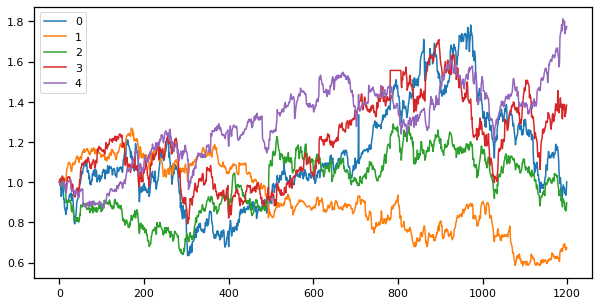

In [7]:
# plot first three of them as example
data.iloc[:,:5].plot()

In [8]:
data

,0,1,2,3,4,5,6,7,8,9,...,413,414,415,416,417,418,419,420,421,422
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991746,1.017239,0.990993,1.012957,0.995050,1.010067,1.011844,0.999663,1.008747,1.006007,...,1.011151,1.010952,1.001453,1.002532,0.989202,1.003808,1.018555,1.000000,1.002643,1.010101
2,0.982666,1.010747,1.004596,1.000166,0.989081,1.005909,1.013039,1.003119,1.006174,0.995100,...,1.007603,1.007436,0.969089,0.996150,0.985371,1.010156,1.022898,1.000000,1.002846,1.019769
3,0.987103,1.017463,0.996875,0.998671,0.983986,1.004486,1.011098,1.004776,1.006432,0.993677,...,1.005322,1.012393,0.954293,0.994356,0.986764,1.008569,1.023885,1.013362,1.002948,1.031457
4,0.929530,1.022725,0.985846,1.014950,0.983986,1.012036,1.013188,1.008907,1.016980,1.009010,...,0.995692,1.011010,0.846631,0.993776,1.002264,1.006982,1.030004,1.014820,1.004066,1.046032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.944284,0.674354,0.863051,1.326910,1.738681,2.069373,0.371454,1.144250,1.040134,1.681789,...,1.496452,1.411575,0.273316,1.034865,1.560084,1.490638,0.916700,0.486395,0.909220,0.517172
1196,0.950062,0.680175,0.871324,1.343189,1.774203,2.095634,0.373644,1.139249,1.046308,1.681948,...,1.523822,1.424775,0.277411,1.053062,1.581853,1.497620,0.920647,0.492711,0.920403,0.519481
1197,0.935411,0.662599,0.856801,1.345847,1.759499,2.091476,0.372449,1.153410,1.026756,1.676257,...,1.510644,1.415437,0.276882,1.044728,1.579067,1.509362,0.910778,0.493683,0.915523,0.514286
1198,0.956046,0.665846,0.869485,1.373422,1.762265,2.085020,0.373395,1.162766,1.025212,1.710085,...,1.540547,1.380620,0.285733,1.057123,1.560954,1.523326,0.906040,0.498542,0.921419,0.525253


## baselines

### OLMAR

In [9]:
# set algo parameters
algo = algos.OLMAR(window=5, eps=10)

# run
result = algo.run(data)

Summary:
    Profit factor: 1.35
    Sharpe ratio: 1.43 ± 0.65
    Ulcer index: 8.83
    Information ratio (wrt UCRP): 1.37
    Appraisal ratio (wrt UCRP): 1.29 ± 0.46
    UCRP sharpe: 0.57 ± 0.49
    Beta / Alpha: 1.42 / 91.363%
    Annualized return: 126.57%
    Annualized volatility: 71.81%
    Longest drawdown: 183 days
    Max drawdown: 36.91%
    Winning days: 54.4%
    Annual turnover: 317.3
        


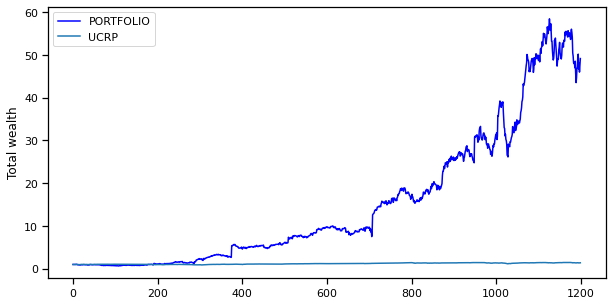

In [10]:
print(result.summary())
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

Summary:
    Profit factor: 1.21
    Sharpe ratio: 1.01 ± 0.56
    Ulcer index: 4.68
    Information ratio (wrt UCRP): 0.94
    Appraisal ratio (wrt UCRP): 0.87 ± 0.46
    UCRP sharpe: 0.57 ± 0.49
    Beta / Alpha: 1.42 / 61.057%
    Annualized return: 67.89%
    Annualized volatility: 71.38%
    Longest drawdown: 229 days
    Max drawdown: 43.93%
    Winning days: 51.8%
    Annual turnover: 317.3
        


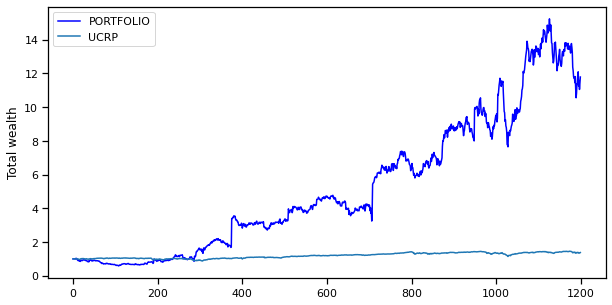

In [11]:
result.fee = 0.001
print(result.summary())
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

Summary:
    Profit factor: 1.03
    Sharpe ratio: 0.38 ± 0.47
    Ulcer index: 1.09
    Information ratio (wrt UCRP): 0.28
    Appraisal ratio (wrt UCRP): 0.22 ± 0.46
    UCRP sharpe: 0.57 ± 0.49
    Beta / Alpha: 1.43 / 15.599%
    Annualized return: 6.98%
    Annualized volatility: 70.80%
    Longest drawdown: 392 days
    Max drawdown: 53.04%
    Winning days: 47.8%
    Annual turnover: 317.3
        


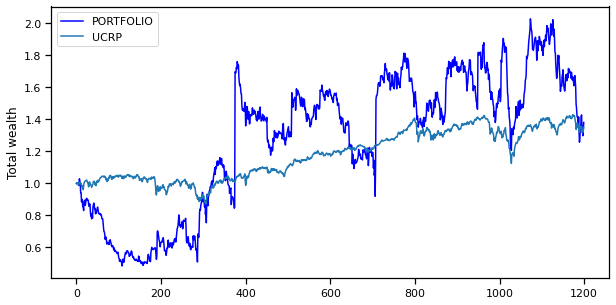

In [12]:
result.fee = 0.0025
print(result.summary())
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

Summary:
    Profit factor: 0.78
    Sharpe ratio: -0.70 ± 0.51
    Ulcer index: -0.63
    Information ratio (wrt UCRP): -0.84
    Appraisal ratio (wrt UCRP): -0.88 ± 0.46
    UCRP sharpe: 0.57 ± 0.49
    Beta / Alpha: 1.43 / -60.165%
    Annualized return: -49.66%
    Annualized volatility: 69.95%
    Longest drawdown: 1192 days
    Max drawdown: 96.48%
    Winning days: 41.8%
    Annual turnover: 317.3
        


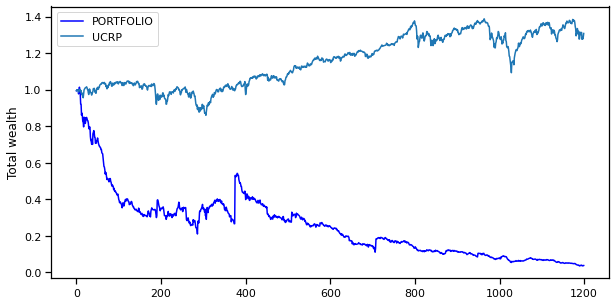

In [13]:
result.fee = 0.005
print(result.summary())
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

### PAMR

In [14]:
# set algo parameters
algo = algos.PAMR()

# run
result = algo.run(data)

/home/linaiqi/anaconda3/envs/gpfinance/lib/python3.7/site-packages/universal/algos/pamr.py:66: RuntimeWarning: divide by zero encountered in double_scalars
  lam = le / np.linalg.norm(x - x_mean)**2


Summary:
    Profit factor: 1.24
    Sharpe ratio: 1.04 ± 0.57
    Ulcer index: 5.18
    Information ratio (wrt UCRP): 0.95
    Appraisal ratio (wrt UCRP): 0.85 ± 0.46
    UCRP sharpe: 0.57 ± 0.49
    Beta / Alpha: 1.41 / 37.996%
    Annualized return: 48.76%
    Annualized volatility: 47.53%
    Longest drawdown: 187 days
    Max drawdown: 34.62%
    Winning days: 52.6%
    Annual turnover: 374.8
        


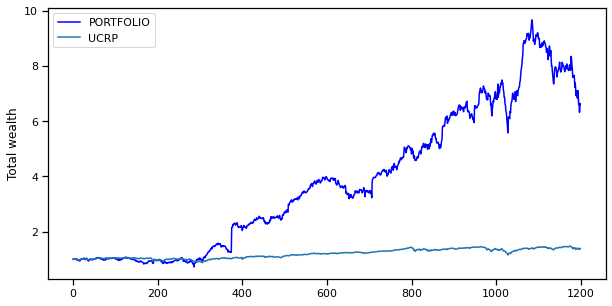

In [15]:
print(result.summary())
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

Summary:
    Profit factor: 1.02
    Sharpe ratio: 0.27 ± 0.47
    Ulcer index: 0.73
    Information ratio (wrt UCRP): 0.12
    Appraisal ratio (wrt UCRP): 0.04 ± 0.46
    UCRP sharpe: 0.57 ± 0.49
    Beta / Alpha: 1.41 / 1.811%
    Annualized return: 3.69%
    Annualized volatility: 47.26%
    Longest drawdown: 367 days
    Max drawdown: 52.65%
    Winning days: 48.7%
    Annual turnover: 374.8
        


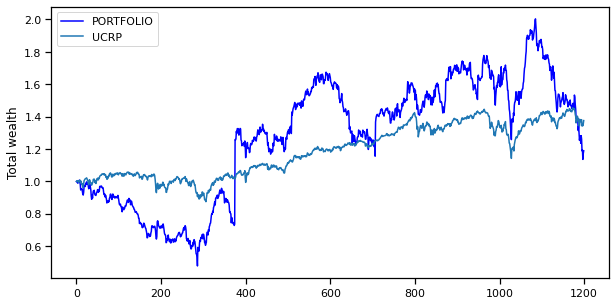

In [16]:
result.fee = 0.001
print(result.summary())
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

Summary:
    Profit factor: 0.76
    Sharpe ratio: -0.88 ± 0.54
    Ulcer index: -0.63
    Information ratio (wrt UCRP): -1.15
    Appraisal ratio (wrt UCRP): -1.19 ± 0.46
    UCRP sharpe: 0.57 ± 0.49
    Beta / Alpha: 1.40 / -52.466%
    Annualized return: -39.71%
    Annualized volatility: 46.88%
    Longest drawdown: 1199 days
    Max drawdown: 91.37%
    Winning days: 41.5%
    Annual turnover: 374.8
        


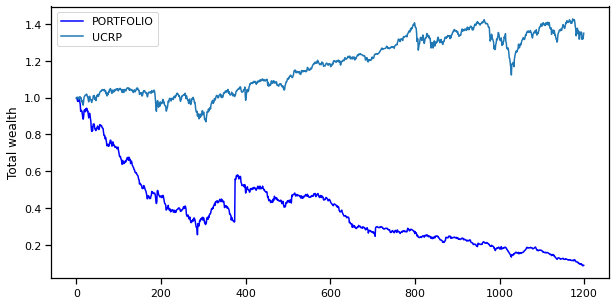

In [17]:
result.fee = 0.0025
print(result.summary())
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

Summary:
    Profit factor: 0.47
    Sharpe ratio: -2.85 ± 1.03
    Ulcer index: -1.47
    Information ratio (wrt UCRP): -3.30
    Appraisal ratio (wrt UCRP): -3.28 ± 0.46
    UCRP sharpe: 0.57 ± 0.49
    Beta / Alpha: 1.39 / -142.929%
    Annualized return: -75.65%
    Annualized volatility: 46.27%
    Longest drawdown: 1199 days
    Max drawdown: 99.88%
    Winning days: 32.2%
    Annual turnover: 374.8
        


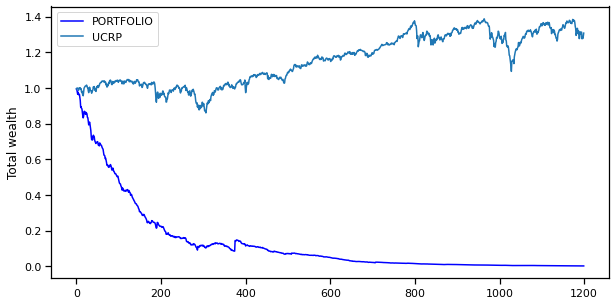

In [18]:
result.fee = 0.005
print(result.summary())
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

### BAH

In [19]:
# set algo parameters
algo = algos.BAH()

# run
result = algo.run(data)

Summary:
    Profit factor: 1.11
    Sharpe ratio: 0.65 ± 0.50
    Ulcer index: 1.92
    Information ratio (wrt UCRP): 0.61
    Appraisal ratio (wrt UCRP): 0.36 ± 0.46
    UCRP sharpe: 0.57 ± 0.49
    Beta / Alpha: 0.99 / 1.323%
    Annualized return: 8.55%
    Annualized volatility: 14.06%
    Longest drawdown: 241 days
    Max drawdown: 21.77%
    Winning days: 54.8%
    Annual turnover: 0.0
        


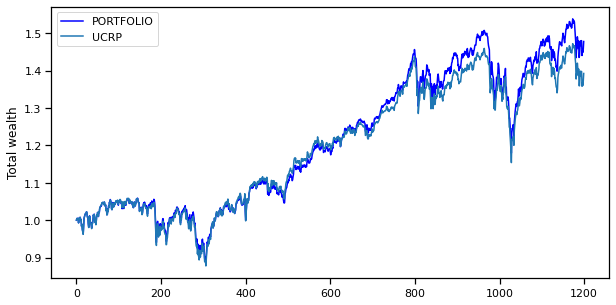

In [20]:
print(result.summary())
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

Summary:
    Profit factor: 1.11
    Sharpe ratio: 0.65 ± 0.50
    Ulcer index: 1.92
    Information ratio (wrt UCRP): 0.60
    Appraisal ratio (wrt UCRP): 0.36 ± 0.46
    UCRP sharpe: 0.57 ± 0.49
    Beta / Alpha: 0.99 / 1.302%
    Annualized return: 8.53%
    Annualized volatility: 14.06%
    Longest drawdown: 241 days
    Max drawdown: 21.77%
    Winning days: 54.8%
    Annual turnover: 0.0
        


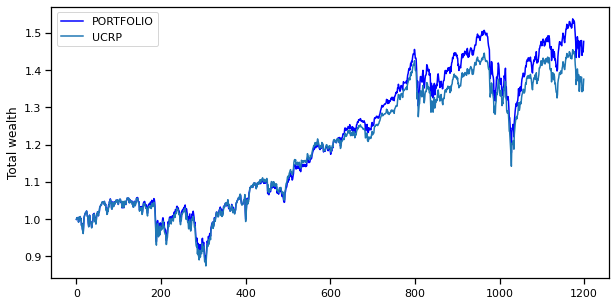

In [21]:
result.fee = 0.001
print(result.summary())
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

Summary:
    Profit factor: 1.11
    Sharpe ratio: 0.65 ± 0.50
    Ulcer index: 1.91
    Information ratio (wrt UCRP): 0.59
    Appraisal ratio (wrt UCRP): 0.35 ± 0.46
    UCRP sharpe: 0.57 ± 0.49
    Beta / Alpha: 0.99 / 1.270%
    Annualized return: 8.49%
    Annualized volatility: 14.07%
    Longest drawdown: 241 days
    Max drawdown: 21.77%
    Winning days: 54.8%
    Annual turnover: 0.0
        


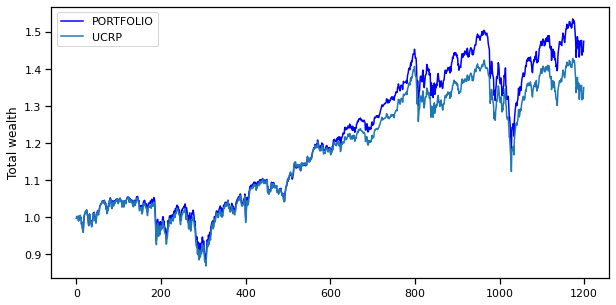

In [22]:
result.fee = 0.0025
print(result.summary())
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

### BNN

In [35]:
# set algo parameters
algo = algos.BNN()

# run
result = algo.run(data)

Summary:
    Profit factor: 0.88
    Sharpe ratio: -0.50 ± 0.49
    Ulcer index: -0.43
    Information ratio (wrt UCRP): -0.81
    Appraisal ratio (wrt UCRP): -0.83 ± 0.46
    UCRP sharpe: 0.57 ± 0.49
    Beta / Alpha: 1.26 / -28.854%
    Annualized return: -23.00%
    Annualized volatility: 37.46%
    Longest drawdown: 1119 days
    Max drawdown: 75.44%
    Winning days: 51.3%
    Annual turnover: 395.5
        


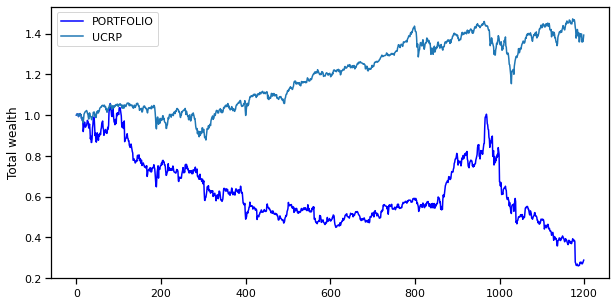

In [36]:
print(result.summary())
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

Summary:
    Profit factor: 0.71
    Sharpe ratio: -1.56 ± 0.68
    Ulcer index: -0.80
    Information ratio (wrt UCRP): -2.00
    Appraisal ratio (wrt UCRP): -1.98 ± 0.46
    UCRP sharpe: 0.57 ± 0.49
    Beta / Alpha: 1.26 / -68.401%
    Annualized return: -48.21%
    Annualized volatility: 37.38%
    Longest drawdown: 1190 days
    Max drawdown: 96.01%
    Winning days: 46.4%
    Annual turnover: 395.5
        


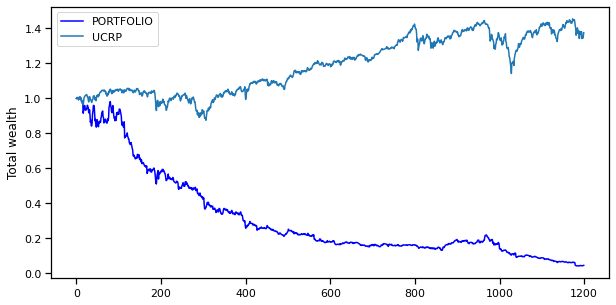

In [37]:
result.fee = 0.001
print(result.summary())
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

Summary:
    Profit factor: 0.52
    Sharpe ratio: -3.16 ± 1.12
    Ulcer index: -1.36
    Information ratio (wrt UCRP): -3.79
    Appraisal ratio (wrt UCRP): -3.69 ± 0.46
    UCRP sharpe: 0.57 ± 0.49
    Beta / Alpha: 1.25 / -127.720%
    Annualized return: -71.47%
    Annualized volatility: 37.34%
    Longest drawdown: 1190 days
    Max drawdown: 99.76%
    Winning days: 40.0%
    Annual turnover: 395.5
        


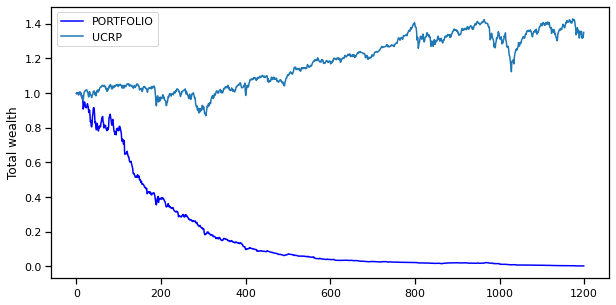

In [38]:
result.fee = 0.0025
print(result.summary())
ax = result.plot(weights=False, assets=False, ucrp=True, logy=False);

# NYSE (O)

## data

<AxesSubplot:>

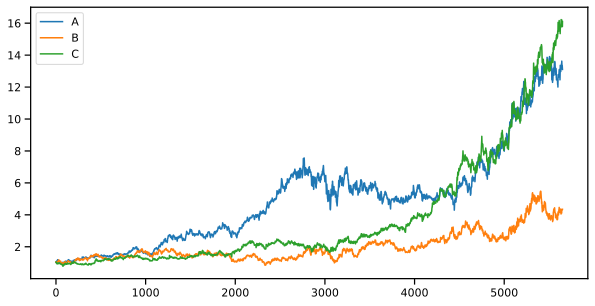

In [13]:
# load data using tools module
data = tools.dataset('nyse_o')

# plot first three of them as example
data.iloc[:,:3].plot()

In [14]:
data

,A,B,C,D,E,F,G,H,I,J,...,[,\,],^,_,`,a,b,c,d
0,1.015150,1.027650,1.041830,1.020830,1.006370,1.049380,1.008470,1.019830,1.054260,0.997510,...,1.031480,1.033770,1.010180,1.014950,1.007750,1.005260,1.011760,1.005780,0.996970,0.997520
1,1.030306,1.069126,1.030422,1.015624,1.011150,0.999996,1.016941,1.028325,1.100774,1.002498,...,1.040743,1.036365,1.022898,1.014950,1.009685,1.005260,1.031368,1.015415,0.987878,0.999994
2,1.030306,1.043777,1.007608,1.013024,0.996822,0.987646,1.014114,1.022659,1.069765,1.002498,...,1.020375,0.994807,1.020351,0.986714,0.996115,0.989467,1.003913,1.015415,1.015153,0.997514
3,1.055559,1.050687,1.034229,1.015627,1.015931,0.987646,1.008465,1.029746,1.069765,1.002498,...,1.031487,1.031167,1.033075,0.983389,1.003864,1.005259,1.003913,1.017345,1.018188,1.019788
4,1.088281,1.034559,1.038035,1.020837,1.019111,1.037029,1.036713,1.033999,1.131779,1.019951,...,1.042596,1.025970,1.027982,0.970103,1.015489,1.002625,1.019604,1.032757,1.030305,1.029690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5646,13.363088,4.332372,15.975170,16.710408,13.384216,52.126458,8.800101,2.964797,14.203320,13.998756,...,14.277373,6.064718,16.126495,53.804543,6.914765,15.476528,42.562995,4.278911,6.303800,5.388019
5647,13.363088,4.317685,15.849925,16.710408,13.277142,52.126458,8.760325,2.949321,13.872951,13.998756,...,14.200560,6.055197,15.705755,53.468802,6.945329,15.613031,41.856024,4.262181,6.332986,5.427513
5648,13.233333,4.303005,15.787317,16.806159,13.250322,52.126458,8.680693,2.980289,13.212321,13.959420,...,14.219731,6.026677,15.705755,52.965126,6.960608,15.749645,41.856024,4.228765,6.362182,5.388055
5649,13.136068,4.332394,15.787317,16.949852,13.357385,52.394388,8.640849,3.019003,13.460052,14.077377,...,14.315714,6.007692,15.775803,53.804624,6.945295,15.795161,42.421499,4.195316,6.537269,5.407775


## baselines

In [32]:
# set algo parameters
algo = algos.OLMAR(window=5, eps=10)

# run
result = algo.run(data)

In [33]:
rt_v = log(result.r.to_numpy())
x_vec = result.B.to_numpy()

In [34]:
for metric in metrics_lst:
    metric_name = metric.split('(')[0]     
    res = eval(metric)
    print('\t%s: %.8f' % (metric_name, res))

	cumulative_return: 76568364766000480.00000000
	daily_return: 1.00690338
	cumulative_return_fee: 0.00000000
	daily_return_fee: 0.00000000
	max_redraw: 0.56531381
	sharpe_ratio: 0.00000000
	volatility: 0.00000000
	turnover: 0.00000000


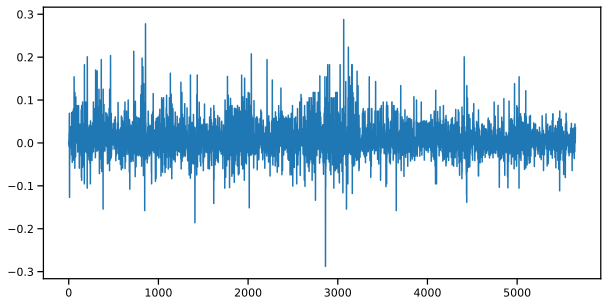

In [39]:
plt.plot(rt_v)

# TSE

## data

<AxesSubplot:>

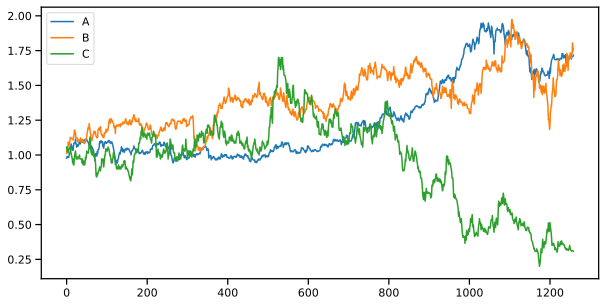

In [9]:
data = tools.dataset('tse')

# plot first three of them as example
data.iloc[:,:3].plot()

In [10]:
data

,A,B,C,D,E,F,G,H,I,J,...,,,,,,,,,,
0,0.977273,1.010790,1.057140,0.981366,1.000000,1.004310,1.014290,1.021510,1.000000,0.991803,...,0.992308,0.988095,1.008660,1.000000,1.018100,1.028990,0.993243,1.025000,1.105260,1.063120
1,0.988639,1.035969,1.028569,0.981366,0.992308,1.051723,1.028571,1.037640,0.994152,0.991803,...,1.084612,0.988095,1.038960,1.043480,1.040722,1.050733,0.986486,1.000000,1.144729,1.066448
2,0.988639,1.053953,1.028569,0.981366,0.992308,1.043102,1.042858,1.037640,0.999998,0.983607,...,1.023074,0.988095,1.064934,1.065216,1.058820,1.043486,0.993243,1.050000,1.184199,1.066448
3,0.982957,1.057547,1.042855,0.968944,0.999998,1.047411,1.114283,1.043015,0.999998,0.991800,...,1.015381,1.011908,1.073592,1.108698,1.054295,1.000007,1.020270,1.100001,1.144726,1.029903
4,0.988638,1.093514,1.014284,0.981366,1.007688,1.043100,1.128569,1.026885,1.017538,0.983604,...,0.980766,1.020388,1.090909,1.108698,1.072397,1.000007,1.013513,1.150007,1.131569,1.023258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,1.709509,1.731276,0.309720,1.425260,2.498877,0.903328,4.154285,0.484345,2.842353,2.029976,...,0.184673,4.382357,0.910744,0.451729,1.624094,0.357779,2.008721,1.199974,2.105369,0.794756
1255,1.706694,1.729760,0.314291,1.431531,2.488814,0.906779,4.099141,0.495611,2.892180,2.021149,...,0.176781,4.412507,0.900356,0.442871,1.653653,0.366799,1.979006,1.229973,2.092211,0.813941
1256,1.706694,1.805627,0.310862,1.433421,2.482107,0.887815,4.043995,0.488853,2.969661,2.021149,...,0.164154,4.422568,0.928060,0.451729,1.651682,0.375819,1.967120,1.219974,2.144851,0.829015
1257,1.706694,1.744934,0.312006,1.423886,2.371417,0.886091,4.043995,0.473084,2.961358,2.007911,...,0.162575,4.312004,0.910745,0.442871,1.645769,0.378825,1.943347,1.219974,2.171168,0.811202


# MSCI

## data

<AxesSubplot:>

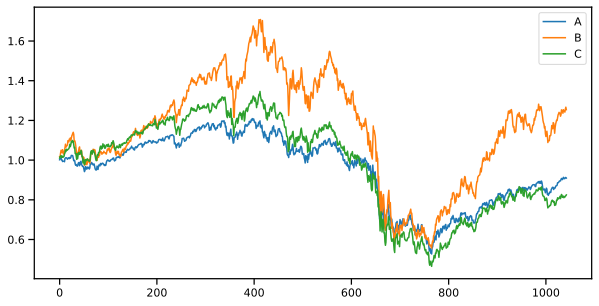

In [11]:
data = tools.dataset('msci')

# plot first three of them as example
data.iloc[:,:3].plot()

In [12]:
data

,A,B,C,D,E,F,G,H,I,J,...,O,P,Q,R,S,T,U,V,W,X
0,1.001782,1.016927,1.010548,1.007359,1.021224,1.006425,1.006093,1.002848,1.014207,1.006901,...,1.013190,1.002958,1.009867,1.007334,1.005961,1.010875,1.004824,1.004028,0.997047,1.014587
1,1.007820,1.017620,1.017713,1.016905,1.026884,1.017003,1.002457,1.010919,1.007791,1.007001,...,1.015242,1.020511,1.021184,1.010326,1.008209,1.021070,1.007876,1.015128,1.010763,1.015643
2,1.012077,1.036428,1.020599,1.024264,1.035751,1.019474,1.007370,1.017566,1.017507,1.023505,...,1.015242,1.024258,1.024376,1.014379,1.013681,1.031459,1.021953,1.017583,1.010287,1.013820
3,1.010097,1.049693,1.022191,1.023369,1.025941,1.014729,1.009827,1.011584,1.028231,1.031306,...,1.037323,1.043092,1.021958,1.011967,1.012020,1.038062,1.033274,1.015422,1.014954,1.031478
4,1.000099,1.045041,1.013335,1.013922,1.008490,0.997034,1.013168,1.007311,1.016774,1.030606,...,1.039277,1.043881,0.999807,0.994499,0.997752,1.025342,1.030321,1.003340,0.997809,1.033397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,0.906256,1.248763,0.816101,1.048926,1.021696,1.031139,1.313090,0.789878,0.852704,0.719544,...,1.203908,0.510009,0.948346,0.864312,0.806411,1.200990,1.166667,0.566896,0.496428,0.714683
1039,0.906949,1.242031,0.813713,1.045048,1.011037,1.033808,1.323703,0.795670,0.847938,0.714843,...,1.222570,0.539789,0.950377,0.865856,0.811004,1.194485,1.155641,0.565324,0.497285,0.726679
1040,0.912196,1.256682,0.819086,1.050219,1.008773,1.040826,1.341293,0.807064,0.857654,0.720944,...,1.229897,0.537915,0.961211,0.872901,0.810124,1.196136,1.173262,0.569450,0.504905,0.725528
1041,0.912394,1.266581,0.820281,1.049423,1.004056,1.026394,1.344143,0.803361,0.854904,0.721144,...,1.231363,0.523321,0.955407,0.866628,0.804163,1.192155,1.174542,0.564735,0.501953,0.732534
